In [1]:
import pyemu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import flopy as fp
from flopy.utils.reference import SpatialReference
import os
import sys
from shutil import copyfile
import fileinput

sys.path.append("../../modules")
# hand made functions
from Rouss import *

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
ws = "workspace"
m_n_i = "pest_3d_r"
m_n = "pest_3D_R"

case = "3D_test"

In [3]:
sim = fp.mf6.MFSimulation.load(sim_ws=ws)
m = sim.get_model(m_n_i)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package oc...
    loading package npf...
    loading package wel...
    loading package rch...
    loading package rch...
    loading package rch...
    loading package wel...
    loading package chd...
    loading package chd...
    loading package drn...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package riv...
    loading package obs...
  loading ims package pest_3d_r...


In [4]:
sr = SpatialReference(delr=m.dis.delr.array, delc=m.dis.delc.array, xll=m.dis.xorigin.array, yll=m.dis.yorigin.array)
sr

xul:664525; yul:6207475; rotation:0; proj4_str:None; units:meters; lenuni:2; length_multiplier:1.0

In [5]:
# empty pst object
template_ws = "template"
pf = pyemu.prototypes.PstFrom(original_d=ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False)

2020-07-26 18:41:01.154314 starting: opening PstFrom.log for logging
2020-07-26 18:41:01.154314 starting PstFrom process
2020-07-26 18:41:01.154314 starting: setting up dirs
2020-07-26 18:41:01.154314 starting: removing existing new_d 'template'
2020-07-26 18:41:01.185563 finished: removing existing new_d 'template' took: 0:00:00.031249
2020-07-26 18:41:01.185563 starting: copying original_d 'workspace' to new_d 'template'
2020-07-26 18:41:01.258571 finished: copying original_d 'workspace' to new_d 'template' took: 0:00:00.073008
2020-07-26 18:41:01.258571 finished: setting up dirs took: 0:00:00.104257


In [6]:
#add observation
#Quat
df = pd.read_csv(os.path.join(template_ws,"heads_q.csv"),index_col=0)
hds_df = pf.add_observations("heads_q.csv",insfile="heads_q.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="quat",obsgp=True)
#P
df = pd.read_csv(os.path.join(template_ws,"heads_pc.csv"),index_col=0)
hds_df = pf.add_observations("heads_pc.csv",insfile="heads_pc.csv.ins",index_cols="time",
                use_cols=list(df.columns.values),prefix="pc",obsgp=True)

#Q map
file = "heads_map_q.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="qmap",obsgp=True)

#P map
file = "heads_map_p.csv"
df = pd.read_csv(os.path.join(template_ws,file),index_col=0)
hds_df = pf.add_observations(file,insfile="{}.ins".format(file),index_cols="time",
                use_cols=list(df.columns.values),prefix="Pmap",obsgp=True)

#pf.obs_dfs[2].weight = 0.5 # set a weaker weigth to these points

2020-07-26 18:41:01.919198 starting: adding observations from tabular output file
2020-07-26 18:41:01.919198 starting: reading list template\heads_q.csv
2020-07-26 18:41:01.919198 finished: reading list template\heads_q.csv took: 0:00:00
2020-07-26 18:41:01.919198 starting: building insfile for tabular output file heads_q.csv
2020-07-26 18:41:01.934812 finished: building insfile for tabular output file heads_q.csv took: 0:00:00.015614
2020-07-26 18:41:01.934812 starting: adding observation from instruction file 'template\heads_q.csv.ins'
2020-07-26 18:41:01.950446 finished: adding observation from instruction file 'template\heads_q.csv.ins' took: 0:00:00.015634
2020-07-26 18:41:01.950446 finished: adding observations from tabular output file took: 0:00:00.031248
2020-07-26 18:41:01.950446 starting: adding observations from tabular output file
2020-07-26 18:41:01.950446 starting: reading list template\heads_pc.csv
2020-07-26 18:41:01.966061 finished: reading list template\heads_pc.csv t

KeyError: "None of [Index(['pmap_usecol:pmap_1_100_30_time:1.0',\n       'pmap_usecol:pmap_1_100_37_time:1.0',\n       'pmap_usecol:pmap_1_100_94_time:1.0',\n       'pmap_usecol:pmap_1_101_125_time:1.0',\n       'pmap_usecol:pmap_1_101_22_time:1.0',\n       'pmap_usecol:pmap_1_102_109_time:1.0',\n       'pmap_usecol:pmap_1_102_117_time:1.0',\n       'pmap_usecol:pmap_1_102_124_time:1.0',\n       'pmap_usecol:pmap_1_102_20_time:1.0',\n       'pmap_usecol:pmap_1_103_124_time:1.0',\n       ...\n       'pmap_usecol:pmap_1_94_53_time:1.0',\n       'pmap_usecol:pmap_1_94_77_time:1.0',\n       'pmap_usecol:pmap_1_96_40_time:1.0',\n       'pmap_usecol:pmap_1_96_85_time:1.0',\n       'pmap_usecol:pmap_1_97_36_time:1.0',\n       'pmap_usecol:pmap_1_97_71_time:1.0',\n       'pmap_usecol:pmap_1_98_102_time:1.0',\n       'pmap_usecol:pmap_1_98_113_time:1.0',\n       'pmap_usecol:pmap_1_98_92_time:1.0',\n       'pmap_usecol:pmap_1_99_101_time:1.0'],\n      dtype='object', length=150)] are in the [index]"

In [7]:
def chInsfle(file):
    
    """
    change a ins file create with PstFrom (only for a model with 1 stress period)
    in the right format to be used by PEST
    """
    
    fileout = "tmp"
    with open(file) as f:
        with open(fileout,"w") as fout:
            for i,line in enumerate(f):
                if i < 2:
                    fout.write(line)
                if i > 1:
                    for o,split in enumerate(line.split("w")):
                        if o == 1:
                            fout.write("~,~")
                        fout.write(split)
                        
    from shutil import copyfile
    copyfile(fileout, file) # copy 
    os.remove(fileout) # delete tmp file

chInsfle("template/heads_pc.csv.ins")
chInsfle("template/heads_q.csv.ins")
chInsfle("template/heads_map_q.csv.ins")
chInsfle("template/heads_map_p.csv.ins")

pf.obs_dfs[0].obgnme = "Quat"
pf.obs_dfs[1].obgnme = "Pc"
pf.obs_dfs[2].obgnme = "Qmap"
pf.obs_dfs[3].obgnme = "Pmap"

In [9]:
pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:0, nnz_obs:372


### Parameters

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\geostats.py:244: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


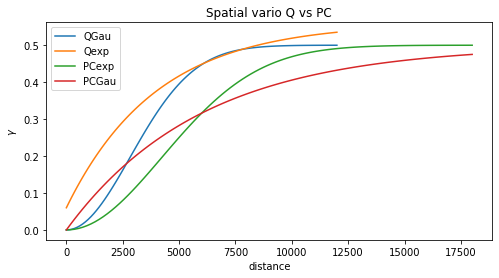

In [10]:
fig,ax = plt.subplots(figsize=(8,4))

#q
vq1 = pyemu.geostats.GauVario(a=4000,contribution=0.5)
vq2 = pyemu.geostats.ExpVario(a=4000,contribution=0.5)
grid_q1 = pyemu.geostats.GeoStruct(variograms=vq1, transform='log')
grid_q2 = pyemu.geostats.GeoStruct(variograms=vq2,nugget=0.06 , transform='log')
b=grid_q1.plot()
b=grid_q2.plot()

#pc
vp1 = pyemu.geostats.GauVario(a=6000,contribution=0.5)
vp2 = pyemu.geostats.ExpVario(a=6000,contribution=0.5)
grid_pc1 = pyemu.geostats.GeoStruct(variograms=vp1, transform='log')
grid_pc2 = pyemu.geostats.GeoStruct(variograms=vp2, transform='log')
a=grid_pc1.plot()
a=grid_pc2.plot()

a.set_title("Spatial vario Q vs PC")
plt.legend(["QGau","Qexp","PCexp","PCGau"])

In [11]:
## pp quat
zq = m.dis.idomain.array[1] # zone array for pp
zq[:,140:]=0
zq[zq<0]=0
#plt.imshow(zq)
pf.add_parameters(filenames="kq.txt",par_type="pilotpoint",pp_space=10,zone_array=zq,
                   par_name_base="kp_q",pargp="pp_q",
                   upper_bound=3,lower_bound=0.005,ult_ubound=6e-3,ult_lbound=1e-5,geostruct=grid_q1)

2020-07-26 18:44:39.599509 starting: adding pilotpoint type multiplier style parameters for file(s) ['kq.txt']
2020-07-26 18:44:39.599509 starting: loading array template\kq.txt
2020-07-26 18:44:39.630768 finished: loading array template\kq.txt took: 0:00:00.031259
2020-07-26 18:44:39.630768 loaded array 'kq.txt' of shape (182, 183)
2020-07-26 18:44:39.684151 starting: writing array-based template file 'kp_q_inst0_pilotpoint.csv.tpl'
2020-07-26 18:44:39.684151 starting: setting up pilot point parameters
2020-07-26 18:44:39.684151 No spatial reference (containing cell spacing) passed.
2020-07-26 18:44:39.684151 OK - using spatial reference in parent object.
2020-07-26 18:44:39.931441 83 pilot point parameters created
2020-07-26 18:44:39.931441 pilot point 'pargp':kp_q_inst:0
2020-07-26 18:44:39.931441 finished: setting up pilot point parameters took: 0:00:00.247290
2020-07-26 18:44:39.947065 starting: calculating factors for pargp=kp_q_inst:0
2020-07-26 18:44:39.947065 saving krige vari

In [12]:
## pp pc
zpc = m.dis.idomain.array[3] # zone array for pp
zpc[:,140:]=0
zpc[zpc<0]=0
#plt.imshow(zpc)

pf.add_parameters(filenames="kpc.txt",par_type="pilotpoint",pp_space=10,zone_array=zpc,
                   par_name_base="kp_pc",pargp="pp_pc",
                   upper_bound=50,lower_bound=0.05,ult_ubound=5e-4,ult_lbound=5e-7,geostruct=grid_pc1)

2020-07-26 18:45:25.795079 starting: adding pilotpoint type multiplier style parameters for file(s) ['kpc.txt']
2020-07-26 18:45:25.795079 starting: loading array template\kpc.txt
2020-07-26 18:45:25.841934 finished: loading array template\kpc.txt took: 0:00:00.046855
2020-07-26 18:45:25.841934 loaded array 'kpc.txt' of shape (182, 183)
2020-07-26 18:45:25.879721 starting: writing array-based template file 'kp_pc_inst0_pilotpoint.csv.tpl'
2020-07-26 18:45:25.879721 starting: setting up pilot point parameters
2020-07-26 18:45:25.879721 No spatial reference (containing cell spacing) passed.
2020-07-26 18:45:25.879721 OK - using spatial reference in parent object.
2020-07-26 18:45:26.227179 110 pilot point parameters created
2020-07-26 18:45:26.227179 pilot point 'pargp':kp_pc_inst:0
2020-07-26 18:45:26.227179 finished: setting up pilot point parameters took: 0:00:00.347458
2020-07-26 18:45:26.242793 starting: calculating factors for pargp=kp_pc_inst:0
2020-07-26 18:45:26.242793 saving kr

2020-07-26 18:46:25.383946 starting: adding zone type multiplier style parameters for file(s) ['irr.txt']
2020-07-26 18:46:25.383946 starting: loading array template\irr.txt
2020-07-26 18:46:25.406085 finished: loading array template\irr.txt took: 0:00:00.022139
2020-07-26 18:46:25.406085 loaded array 'irr.txt' of shape (182, 183)
2020-07-26 18:46:25.437346 starting: writing array-based template file 'irr_inst0_zone.csv.tpl'
2020-07-26 18:46:25.437346 starting: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0']
2020-07-26 18:46:25.552811 finished: writing template file irr_inst0_zone.csv.tpl for ['irr_inst:0'] took: 0:00:00.115465
2020-07-26 18:46:25.552811 finished: writing array-based template file 'irr_inst0_zone.csv.tpl' took: 0:00:00.115465
2020-07-26 18:46:25.568436 starting: adding parameters for file(s) ['irr.txt']


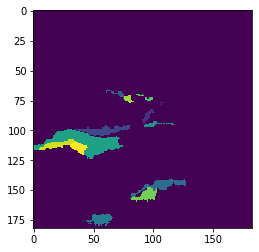

In [13]:
#irri
zi = np.loadtxt(os.path.join(ws,"zone_irr.txt"))
plt.imshow(zi)
pf.add_parameters(filenames="irr.txt",par_type="zone",zone_array=zi,
                   par_name_base="irr",pargp="irr",
                   upper_bound=2,lower_bound=0.8)

In [14]:
# kpms and kep
# pf.add_parameters(filenames="kep.txt",par_type="constant",
#                    par_name_base="ep",pargp="ep",
#                    upper_bound=10,lower_bound=0.1)
pf.add_parameters(filenames="kpms.txt",par_type="constant",
                 par_name_base="pms",pargp="pms",upper_bound=30,lower_bound=0.05)

2020-07-26 18:46:36.609863 starting: adding constant type multiplier style parameters for file(s) ['kpms.txt']
2020-07-26 18:46:36.609863 starting: loading array template\kpms.txt
2020-07-26 18:46:36.660259 finished: loading array template\kpms.txt took: 0:00:00.050396
2020-07-26 18:46:36.660259 loaded array 'kpms.txt' of shape (182, 183)
2020-07-26 18:46:36.707145 starting: writing array-based template file 'pms_inst0_constant.csv.tpl'
2020-07-26 18:46:36.707145 starting: writing template file pms_inst0_constant.csv.tpl for ['pms_inst:0']
2020-07-26 18:46:36.892062 finished: writing template file pms_inst0_constant.csv.tpl for ['pms_inst:0'] took: 0:00:00.184917
2020-07-26 18:46:36.892062 finished: writing array-based template file 'pms_inst0_constant.csv.tpl' took: 0:00:00.184917
2020-07-26 18:46:36.938936 starting: adding parameters for file(s) ['kpms.txt']


### rivers

In [15]:
rivers = [riv for riv in os.listdir(template_ws) if riv.endswith("riv")]

In [16]:
def riv_tpl(rivers,tmp_ws):
    for riv in rivers:
        riv_file = os.path.join(tmp_ws,riv)
        tpl_file = riv_file+".tpl"
        copyfile(riv_file, tpl_file)
        
        with fileinput.FileInput(tpl_file, inplace=True) as file:
            for line in file:
                print(line.replace("    0.00500000   ", "~    c_{}     ~".format(riv.split(".")[0])), end='')
        with open(tpl_file, 'r+') as f:
            content = f.read()
            line = "ptf ~"
            f.seek(0, 0)
            f.write(line.rstrip('\r\n') + "\n" + content)
        
        #add parameter to control file
        dic = {"parnme":"c_{}".format(riv.split(".")[0]),
              "parval1": 0.005,
               "pargp": "cond",
               "tpl_filename": tpl_file,
               'input_filename':riv_file,
               "partype" : "constant",
               "partrans" : "log",
               "parubnd" : 0.01,
               "parlbnd" : 0.001,
               "parchglim" : "factor",
               "scale" : 1.0,
               "dercom" : 1,
               "offset" : 0.0} 
        a = pd.DataFrame(dic,index=["c_{}".format(riv.split(".")[0])])
        pf.par_dfs[0] = pf.par_dfs[0].append(a,sort=False)
        
        pf.tpl_filenames.append(riv+".tpl")
        pf.input_filenames.append(riv)

In [17]:
riv_tpl(rivers,template_ws)

In [18]:
pf.build_pst("{}.pst".format(case))

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:472: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  par_data = pd.concat(self.par_dfs).loc[:, par_data_cols]
C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\prototypes\pst_from.py:127: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


noptmax:30, npar_adj:214, nnz_obs:372


In [19]:
# add run model command
pf.mod_sys_cmds.append("..\..\..\exe\mf6")
pst = pf.build_pst("{}.pst".format(case))

noptmax:30, npar_adj:214, nnz_obs:372
2020-07-26 18:46:45.403915 forward_run line:pyemu.os_utils.run(r'..\..\..\exe\mf6')



2020-07-26 18:46:46.160161 starting: building prior covariance matrix
2020-07-26 18:46:46.224680 saving prior covariance matrix to file template\3D_test.prior.cov
2020-07-26 18:46:46.255928 finished: building prior covariance matrix took: 0:00:00.095767


C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\utils\helpers.py:248: UserWarning: geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!
  warnings.warn("geostatistical_prior_builder() warning: geostruct sill != 1.0, user beware!")


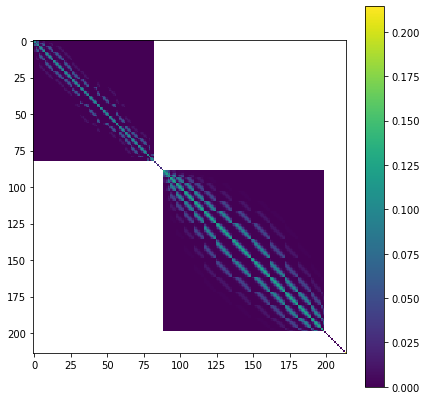

In [20]:
cov = pf.build_prior()
x = cov.x.copy()
x[x==0.0] = np.NaN
fig,ax = plt.subplots(1,1,figsize=(7,7))
g = ax.imshow(x)
plt.colorbar(g)

In [21]:
pst.control_data.noptmax = -1 # FOR JACOBIAN
pst.write(os.path.join(template_ws,"{}.pst".format(case)))

noptmax:-1, npar_adj:214, nnz_obs:372


In [47]:
#pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd="template")

In [22]:
m_d = "master_glm"

pyemu.os_utils.start_workers(template_ws,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",master_dir=m_d)

In [23]:
t_d ="master_glm"
case = "3D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

#pst.svd_data.eigthresh = 5e-7
pst.control_data.noptmax = 8 # number of iterations (should be set to a great value (50))
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

# DO the inversion
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",
                             master_dir=m_d)

noptmax:8, npar_adj:214, nnz_obs:372
